# In-class exercise for Lecture 11.

Data from https://arxiv.org/pdf/1403.6034.pdf

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns
import networkx as nx
import scipy


In [2]:
# Load in the data

region_names_and_coordinates = pd.read_csv('data/region_names_and_coordinates.csv',
                                           header = None,
                                           names = ['num','hemisphere','region_name','x','y','z'])
region_names_and_coordinates.head()

,num,hemisphere,region_name,x,y,z
0,1,L,Frontal pole,-25,54,7
1,2,L,Insular cortex,-35,1,1
2,3,L,Superior frontal gyrus,-14,18,57
3,4,L,Middle frontal gyrus,-38,18,42
4,5,L,"Inferior frontal gyrus, pars triangularis",-48,28,9


In [3]:
# Let's keep just the region names for now
region_names = region_names_and_coordinates['region_name']
region_names

0                                        Frontal pole
1                                      Insular cortex
2                              Superior frontal gyrus
3                                Middle frontal gyrus
4           Inferior frontal gyrus, pars triangularis
                            ...                      
107                                          Thalamus
108                                 Nucleus Accumbens
109    Parahippocampal gyrus (superior to ROIs 34,35)
110                                       Hippocampus
111                                         Brainstem
Name: region_name, Length: 112, dtype: object

['groups.csv', 'Abootstrap10.csv', '.DS_Store', 'region_names_and_coordinates.csv', 'Abootstrap1.csv', 'Abootstrap3.csv', '.gitkeep', 'Abootstrap2.csv', 'Abootstrap6.csv', 'Abootstrap7.csv', 'Abootstrap5.csv', 'Abootstrap4.csv', 'Abootstrap9.csv', 'Abootstrap8.csv', 'combined_data.csv']

 done loading brains :)


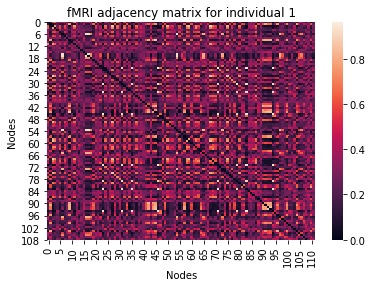

In [4]:
print(os.listdir('./data'))


n_individuals = 10
n_nodes = 112
brain_array = np.zeros((n_nodes, n_nodes, n_individuals))

for i in range(n_individuals):
    brain_i = np.genfromtxt(f'data/Abootstrap{i+1}.csv', delimiter = ',')
    np.fill_diagonal(brain_i, 0)
    brain_array[:, :, i] = brain_i
    
print('\n done loading brains :)')

# Plot just one as a heatmap
example_number = 1
fig_0 = sns.heatmap(brain_array[:, :, example_number])
fig_0.set(xlabel = 'Nodes', ylabel = 'Nodes', title = f'fMRI adjacency matrix for individual {example_number}');

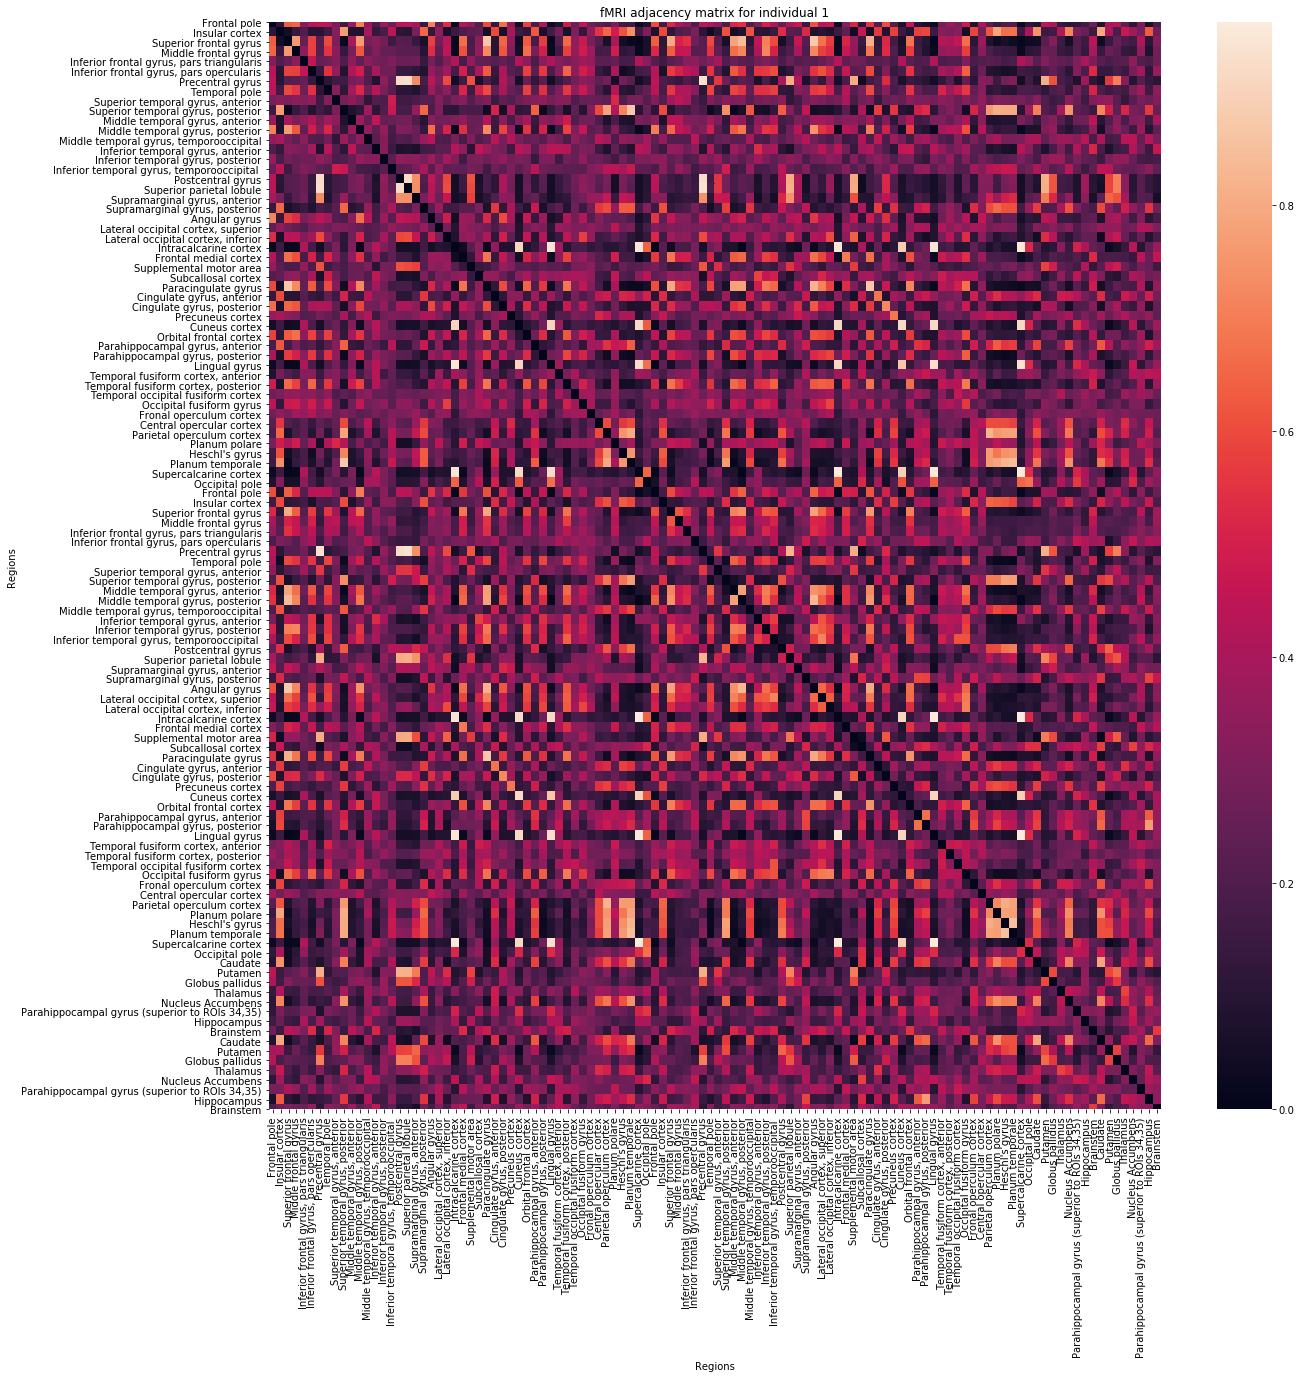

In [5]:
# For fun, let's draw a BIG heatmap with all of the region names

plt.figure(figsize = (20,20))
fig_1 = sns.heatmap(brain_array[:, :, example_number], xticklabels = region_names, yticklabels = region_names)
fig_1.set(xlabel = 'Regions', ylabel = 'Regions', title = f'fMRI adjacency matrix for individual {example_number}');

## t-test

With the region names, we can now ask more specific questions about particular regions and their function in motor skill learning. Consider the superior temporal gyrus (posterior) in both the left and right hemispheres. These areas are also referred to as the primary auditory cortex of the brain, and as one might imagine, are involved in processing sound (including music, language, etc.). We are curious to know whether the auditory cortex plays an important role in the network as participants play the finger sequences. 

In [6]:
np.where(region_names == 'Superior temporal gyrus, posterior')[0]

# The first is from the left hemisphere, the second from the right.

array([ 9, 57])

## Question: is the mean strength of connections emanating from the left superior frontal gyrus in one individual equal to the global mean of that individual's edges?

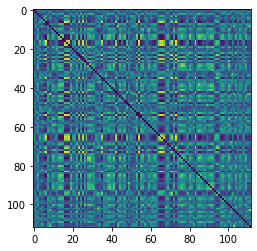

In [7]:
my_individual = 9

adj = brain_array[:, :, my_individual]

plt.imshow(adj)

(112, 112)

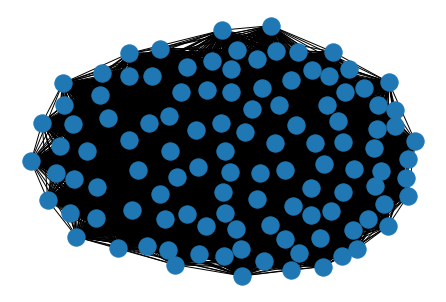

In [16]:
# Step 1: Turn the adjacency matrix into a graph.

G = nx.from_numpy_array(adj, parallel_edges = False)
G = nx.draw(G, pos = nx.spring_layout(G))


In [9]:
# Step 2: Get the edge weights of all edges


# print(G.edges(data = True)) to see all of the edge data in G
edge_weights = np.array([d['weight'] for u,v,d in G.edges(data = True)])


AttributeError: 'NoneType' object has no attribute 'edges'

In [ ]:
# Step 3: Calculate the mean of the edge weights

edge_weights_mean = 

In [ ]:
# Step 4: Calculate the mean of the edge weights from the left superior temporal gyrus

stg_index_left = np.where(region_names == 'Superior temporal gyrus, posterior')[0][0]
stg_left_edge_weights = adj[stg_index_left, :]

stg_left_edge_weights_mean = 

In [ ]:
# Step 5: Compute the standard error of the mean.

n_edges = 
edge_weights_stdev = 

edge_weights_sterr = 


In [ ]:
# Step 6: Compute the t-statistic

# What is Ybar here? What is mu? 
t_stat = 


In [ ]:
# Step 7: Use a Student's t-distribution table to find the critical values

# How many degrees of freedom do we have?

In [ ]:
# Step 8: Do we reject the hypothesis?


# Don't forget to submit your individual number (`my_individual`), t-statistic, p-value, and conclusion to Canvas!